In [1]:
import numpy as np 
import pandas as pd 
print(np.__version__)
print(pd.__version__)

2.1.3
2.2.3


Synthetic Data Generation

In [3]:
import pandas as pd
import numpy as np

# Function to generate random values within a specified range
def generate_cyp_interaction():
    return np.random.choice([0, 1, 2, 3])

def generate_binding_affinity():
    return np.round(np.random.uniform(0.4, 1.0), 2)

def generate_renal_clearance():
    return np.round(np.random.uniform(50, 200), 1)

def generate_logp():
    return np.round(np.random.uniform(1.0, 5.0), 2)

# Function to calculate interaction based on PK features
def calculate_interaction(cyp1, binding1, clearance1, logp1, cyp2, binding2, clearance2, logp2):
    # Rule-based interaction calculations
    interaction = 0  # Default: no interaction

    # Substrate + Inhibitor scenario (CYP3A4 interaction)
    if (cyp1 == 1 and cyp2 == 2) or (cyp1 == 2 and cyp2 == 1):
        interaction = 1
    
    # Similar clearance + binding affinity interaction
    if np.abs(clearance1 - clearance2) < 30 and np.abs(binding1 - binding2) < 0.2:
        interaction = 1
    
    # Introducing randomness to simulate real-world data
    if np.random.rand() < 0.05:
        interaction = np.random.choice([0, 1])  # Random noise to introduce some uncertainty

    return interaction

# Generate synthetic dataset
num_samples = 7000
data = []

for _ in range(num_samples):
    # Generate random features for Drug1 and Drug2
    cyp1 = generate_cyp_interaction()
    binding1 = generate_binding_affinity()
    clearance1 = generate_renal_clearance()
    logp1 = generate_logp()
    
    cyp2 = generate_cyp_interaction()
    binding2 = generate_binding_affinity()
    clearance2 = generate_renal_clearance()
    logp2 = generate_logp()
    
    # Calculate interaction
    interaction = calculate_interaction(cyp1, binding1, clearance1, logp1, cyp2, binding2, clearance2, logp2)
    
    # Append data
    data.append([cyp1, binding1, clearance1, logp1, cyp2, binding2, clearance2, logp2, interaction])

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'Drug1_CYP3A4', 'Drug1_Binding_Affinity', 'Drug1_Renal_Clearance', 'Drug1_LogP',
    'Drug2_CYP3A4', 'Drug2_Binding_Affinity', 'Drug2_Renal_Clearance', 'Drug2_LogP', 'Interaction'
])

# Save the dataset to a CSV file
df.to_csv('data/synthetic_drug_interaction.csv', index=False)

# Display a sample of the dataset
print(df.head())


   Drug1_CYP3A4  Drug1_Binding_Affinity  Drug1_Renal_Clearance  Drug1_LogP  \
0             0                    0.74                  194.7        2.11   
1             3                    0.65                  146.0        1.93   
2             1                    0.76                   89.3        4.73   
3             0                    0.85                  120.6        4.72   
4             0                    0.88                  198.5        2.54   

   Drug2_CYP3A4  Drug2_Binding_Affinity  Drug2_Renal_Clearance  Drug2_LogP  \
0             3                    0.57                  131.3        3.73   
1             3                    0.74                   94.4        4.67   
2             2                    0.74                   92.4        3.20   
3             2                    0.88                   86.7        1.16   
4             0                    0.57                  192.0        3.49   

   Interaction  
0            0  
1            0  
2          

Checking for missing values in the dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('data/synthetic_drug_interaction.csv')

# Check for missing values
print(df.isnull().sum())

# Quick overview
print(df.describe())
print(df['Interaction'].value_counts())


Drug1_CYP3A4              0
Drug1_Binding_Affinity    0
Drug1_Renal_Clearance     0
Drug1_LogP                0
Drug2_CYP3A4              0
Drug2_Binding_Affinity    0
Drug2_Renal_Clearance     0
Drug2_LogP                0
Interaction               0
dtype: int64
       Drug1_CYP3A4  Drug1_Binding_Affinity  Drug1_Renal_Clearance  \
count   7000.000000              7000.00000            7000.000000   
mean       1.517286                 0.70031             125.507757   
std        1.116062                 0.17336              43.072901   
min        0.000000                 0.40000              50.000000   
25%        1.000000                 0.55000              88.900000   
50%        2.000000                 0.71000             125.300000   
75%        3.000000                 0.85000             162.900000   
max        3.000000                 1.00000             200.000000   

        Drug1_LogP  Drug2_CYP3A4  Drug2_Binding_Affinity  \
count  7000.000000   7000.000000            

Normalizing Numerical Features

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('data/synthetic_drug_interaction.csv')

# Normalize numerical features
scaler = MinMaxScaler()
numerical_cols = [
    'Drug1_Binding_Affinity', 'Drug1_Renal_Clearance', 'Drug1_LogP',
    'Drug2_Binding_Affinity', 'Drug2_Renal_Clearance', 'Drug2_LogP'
]

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save the normalized dataset
df.to_csv('data/normalized_dataset.csv', index=False)


One-Hot encoding the dataset for training 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the one-hot encoded dataset
df = pd.read_csv('data/one_hot_encoded_dataset.csv')

# Define features (X) and target (y)
X = df.drop('Interaction', axis=1)
y = df['Interaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Save the training dataset
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('data/train_dataset.csv', index=False)

# Save the testing dataset
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('data/test_dataset.csv', index=False)

print("Datasets have been split and saved successfully!")


Datasets have been split and saved successfully!


Converting String One-Hot Encode values into binary one hot encoded values

In [ ]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('data/train_dataset.csv')
test_data = pd.read_csv('data/test_dataset.csv')

# List of columns that need to be updated
columns_to_update = ['Drug2_LogP', 'Drug1_CYP_0', 'Drug1_CYP_1', 'Drug1_CYP_2', 'Drug1_CYP_3','Drug2_CYP_0', 'Drug2_CYP_1', 'Drug2_CYP_2', 'Drug2_CYP_3']

# Replace True/False with 1/0 for the specified columns
train_data[columns_to_update] = train_data[columns_to_update].replace({True: 1, False: 0}).astype(int)
test_data[columns_to_update] = test_data[columns_to_update].replace({True: 1, False: 0}).astype(int)

# Save the updated datasets to new files
train_data.to_csv('data/train_dataset_updated.csv', index=False)
test_data.to_csv('data/test_dataset_updated.csv', index=False)

print("Datasets updated and saved as 'train_dataset_updated.csv' and 'test_dataset_updated.csv'")




Datasets updated and saved as 'train_dataset_updated.csv' and 'test_dataset_updated.csv'


C:\Users\ojasv\AppData\Local\Temp\ipykernel_14896\1948322902.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[columns_to_update] = train_data[columns_to_update].replace({True: 1, False: 0}).astype(int)
C:\Users\ojasv\AppData\Local\Temp\ipykernel_14896\1948322902.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data[columns_to_update] = test_data[columns_to_update].replace({True: 1, False: 0}).astype(int)


Class Distribution (in percentage):
Interaction
0    69.514286
1    30.485714
Name: proportion, dtype: float64


<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
C:\Users\ojasv\AppData\Local\Temp\ipykernel_9792\1005948335.py:4: SyntaxWarning: invalid escape sequence '\o'
  train_data = pd.read_csv('data\one_hot_encoded_dataset(imbalanced).csv')


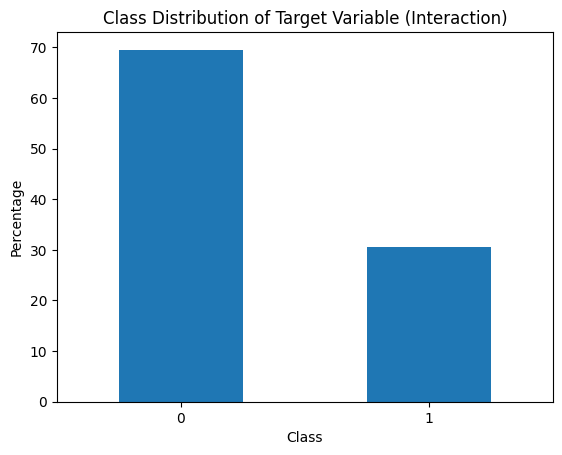

In [3]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('data\one_hot_encoded_dataset(imbalanced).csv')

# Check the distribution of the target variable (Interaction)
class_distribution = train_data['Interaction'].value_counts(normalize=True) * 100

# Print the distribution of each class in percentage
print("Class Distribution (in percentage):")
print(class_distribution)

# Optionally, visualize the class distribution using a bar plot
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.title('Class Distribution of Target Variable (Interaction)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


Fixing Class imbalance

In [4]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
train_data = pd.read_csv('data/one_hot_encoded_dataset(imbalanced).csv')

# Convert TRUE/FALSE to 1/0 in the one-hot encoded columns
columns_to_update = ['Drug1_CYP_0', 'Drug1_CYP_1', 'Drug1_CYP_2', 'Drug1_CYP_3','Drug2_CYP_0', 'Drug2_CYP_1', 'Drug2_CYP_2', 'Drug2_CYP_3']
train_data[columns_to_update] = train_data[columns_to_update].replace({True: 1, False: 0})

# Separate the majority and minority classes
majority_class = train_data[train_data['Interaction'] == 0]
minority_class = train_data[train_data['Interaction'] == 1]

# Option 1: Oversample the minority class
minority_upsampled = resample(minority_class, 
                               replace=True,      # Sample with replacement
                               n_samples=len(majority_class),  # Match the majority class size
                               random_state=42)   # For reproducibility

# Combine the majority class with the upsampled minority class
balanced_train_data = pd.concat([majority_class, minority_upsampled])

# Option 2: If you prefer undersampling the majority class, you can do the following:
# majority_downsampled = resample(majority_class, 
#                                  replace=False,     # Sample without replacement
#                                  n_samples=len(minority_class),  # Match the minority class size
#                                  random_state=42)  # For reproducibility

# balanced_train_data = pd.concat([majority_downsampled, minority_class])

# Save the balanced dataset
balanced_train_data.to_csv('data/onehot_dataset_encoded(balanced).csv', index=False)

print("Balanced dataset saved as 'onehot_dataset_(balanced).csv'")


Balanced dataset saved as 'onehot_dataset_(balanced).csv'


C:\Users\ojasv\AppData\Local\Temp\ipykernel_9792\3027103629.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[columns_to_update] = train_data[columns_to_update].replace({True: 1, False: 0})


Checking class imbalance again

Class Distribution (in percentage):
Interaction
0    50.0
1    50.0
Name: proportion, dtype: float64


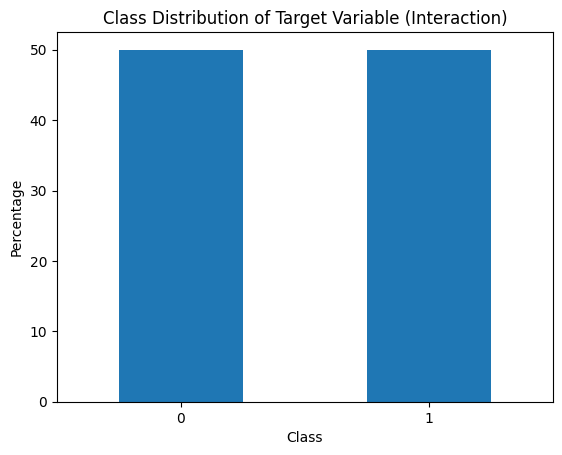

In [5]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('data/onehot_dataset_encoded(balanced).csv')

# Check the distribution of the target variable (Interaction)
class_distribution = train_data['Interaction'].value_counts(normalize=True) * 100

# Print the distribution of each class in percentage
print("Class Distribution (in percentage):")
print(class_distribution)

# Optionally, visualize the class distribution using a bar plot
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar')
plt.title('Class Distribution of Target Variable (Interaction)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the one-hot encoded dataset
df = pd.read_csv('data/without_onehot_dataset_(balanced).csv')

# Define features (X) and target (y)
X = df.drop('Interaction', axis=1)
y = df['Interaction']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('data/train_dataset(without_onehot).csv', index=False)

# Save the testing dataset
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('data/test_dataset(without_onehot).csv', index=False)

print("Datasets have been split and saved successfully!")


Datasets have been split and saved successfully!


Detecting Outliers

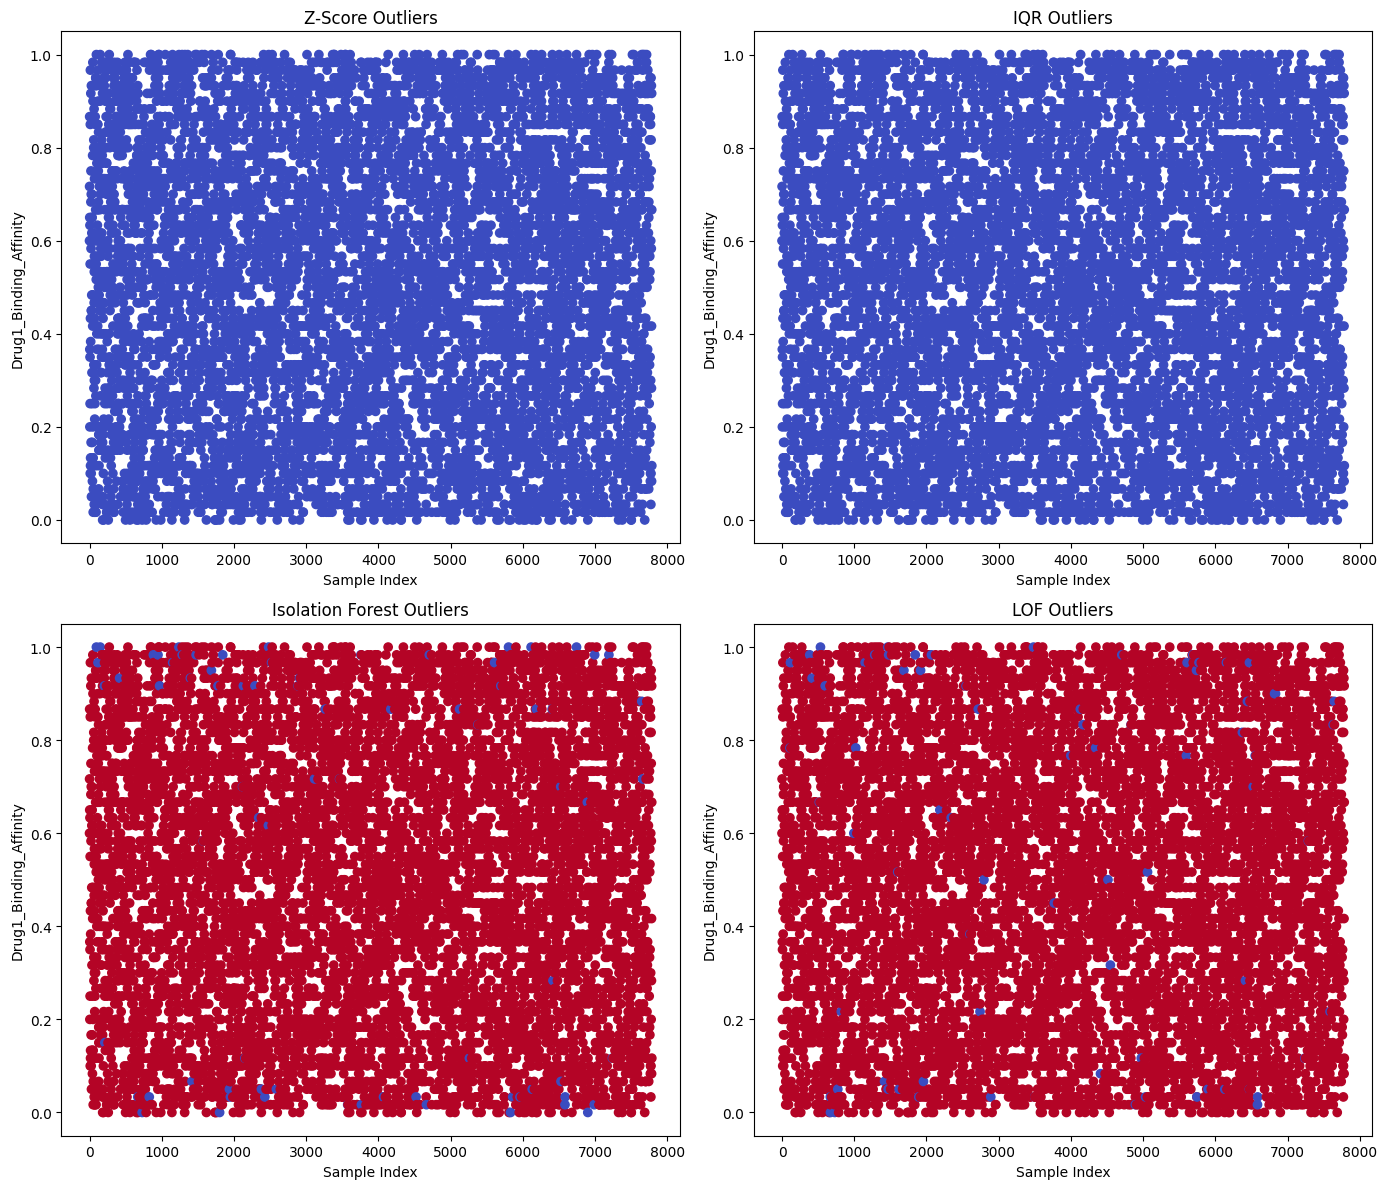

Z-Score Method Outliers Detected: Drug1_Binding_Affinity    0
Drug1_Renal_Clearance     0
Drug1_LogP                0
Drug2_Binding_Affinity    0
Drug2_Renal_Clearance     0
Drug2_LogP                0
dtype: int64
IQR Method Outliers Detected: Drug1_Binding_Affinity    0
Drug1_Renal_Clearance     0
Drug1_LogP                0
Drug2_Binding_Affinity    0
Drug2_Renal_Clearance     0
Drug2_LogP                0
dtype: int64
Isolation Forest Outliers Detected: 76
LOF Method Outliers Detected: 78


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Step 1: Load the dataset
train_data = pd.read_csv('data/train_dataset(without_onehot).csv')

# Step 2: Select features (assuming relevant features for the analysis)
selected_features = [
    'Drug1_Binding_Affinity', 'Drug1_Renal_Clearance', 'Drug1_LogP','Drug1_CYP_0','Drug1_CYP_1','Drug1_CYP_2','Drug1_CYP_3',
    'Drug2_Binding_Affinity', 'Drug2_Renal_Clearance', 'Drug2_LogP', 'Drug2_CYP_0','Drug2_CYP_1','Drug2_CYP_2','Drug2_CYP_3'
    

]

# Extract the selected features
X_train = train_data[selected_features]

# Step 3: Z-Score Method for Outlier Detection
z_scores = np.abs((X_train - X_train.mean()) / X_train.std())

# Define a threshold for Z-scores to detect outliers
z_threshold = 3
outliers_zscore = (z_scores > z_threshold)

# Step 4: IQR Method for Outlier Detection
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))

# Step 5: Isolation Forest Method for Outlier Detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers_iso = iso_forest.fit_predict(X_train)

# Step 6: LOF (Local Outlier Factor) Method for Outlier Detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers_lof = lof.fit_predict(X_train)

# Step 7: Visualize Outliers Detection Results

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot Z-Score Outliers
axes[0, 0].set_title('Z-Score Outliers')
axes[0, 0].scatter(range(len(X_train)), X_train['Drug1_Binding_Affinity'], c=outliers_zscore['Drug1_Binding_Affinity'], cmap='coolwarm', label='Outliers')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Drug1_Binding_Affinity')

# Plot IQR Outliers
axes[0, 1].set_title('IQR Outliers')
axes[0, 1].scatter(range(len(X_train)), X_train['Drug1_Binding_Affinity'], c=outliers_iqr['Drug1_Binding_Affinity'], cmap='coolwarm', label='Outliers')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Drug1_Binding_Affinity')

# Plot Isolation Forest Outliers
axes[1, 0].set_title('Isolation Forest Outliers')
axes[1, 0].scatter(range(len(X_train)), X_train['Drug1_Binding_Affinity'], c=outliers_iso, cmap='coolwarm', label='Outliers')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Drug1_Binding_Affinity')

# Plot LOF Outliers
axes[1, 1].set_title('LOF Outliers')
axes[1, 1].scatter(range(len(X_train)), X_train['Drug1_Binding_Affinity'], c=outliers_lof, cmap='coolwarm', label='Outliers')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Drug1_Binding_Affinity')

# Show plot
plt.tight_layout()
plt.show()


print("Z-Score Method Outliers Detected:", outliers_zscore.sum())
print("IQR Method Outliers Detected:", outliers_iqr.sum())
print("Isolation Forest Outliers Detected:", (outliers_iso == -1).sum())  # Isolation Forest labels outliers as -1
print("LOF Method Outliers Detected:", (outliers_lof == -1).sum())  # LOF labels outliers as -1
